#**Archisha Sinha**
#Domain: Natural Language Processings
#Topic: Sentiment Analysis

SENTIMENT ANALYSIS

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

In [ ]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
csv_file = 'Airline-Sentiment-2-w-AA.csv'
df = pd.read_csv(csv_file, encoding='latin1')

In [ ]:
print("Dataset Info:")
print(df.info())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   _unit_id                      14640 non-null  int64  
 1   _golden                       14640 non-null  bool   
 2   _unit_state                   14640 non-null  object 
 3   _trusted_judgments            14640 non-null  int64  
 4   _last_judgment_at             14584 non-null  object 
 5   airline_sentiment             14640 non-null  object 
 6   airline_sentiment:confidence  14640 non-null  float64
 7   negativereason                9178 non-null   object 
 8   negativereason:confidence     10522 non-null  float64
 9   airline                       14640 non-null  object 
 10  airline_sentiment_gold        40 non-null     object 
 11  name                          14640 non-null  object 
 12  negativereason_gold           32 non-null     

In [ ]:
print("\nFirst Few Rows:")
print(df.head())


First Few Rows:
    _unit_id  _golden _unit_state  _trusted_judgments _last_judgment_at  \
0  681448150    False   finalized                   3      2/25/15 5:24   
1  681448153    False   finalized                   3      2/25/15 1:53   
2  681448156    False   finalized                   3     2/25/15 10:01   
3  681448158    False   finalized                   3      2/25/15 3:05   
4  681448159    False   finalized                   3      2/25/15 5:50   

  airline_sentiment  airline_sentiment:confidence negativereason  \
0           neutral                        1.0000            NaN   
1          positive                        0.3486            NaN   
2           neutral                        0.6837            NaN   
3          negative                        1.0000     Bad Flight   
4          negative                        1.0000     Can't Tell   

   negativereason:confidence         airline airline_sentiment_gold  \
0                        NaN  Virgin America        

In [ ]:
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
_unit_id                            0
_golden                             0
_unit_state                         0
_trusted_judgments                  0
_last_judgment_at                  56
airline_sentiment                   0
airline_sentiment:confidence        0
negativereason                   5462
negativereason:confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_id                            0
tweet_location                   4733
user_timezone                    4820
dtype: int64


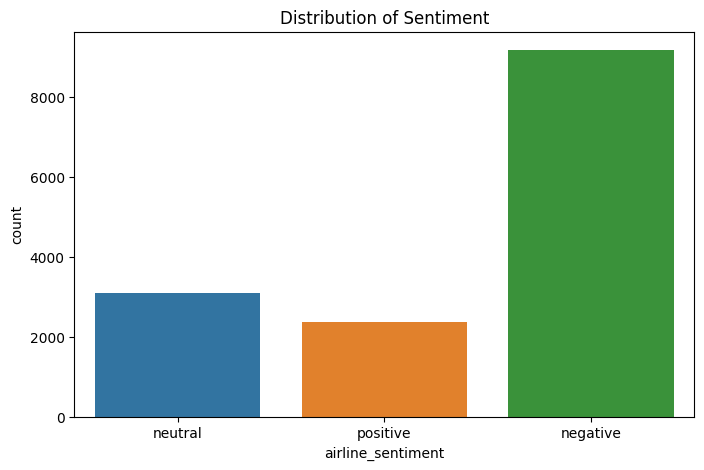

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='airline_sentiment')
plt.title('Distribution of Sentiment')
plt.show()

In [ ]:
stop_words = set(stopwords.words('english'))
ps = PorterStemmer()

def preprocess_text(text):
    text = text.lower()
    words = word_tokenize(text)
    words = [ps.stem(word) for word in words if word.isalnum() and word not in stop_words]
    return ' '.join(words)

In [ ]:
df['text'] = df['text'].apply(preprocess_text)

In [ ]:
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # You can adjust the number of features
X = tfidf_vectorizer.fit_transform(df['text'])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, df['airline_sentiment'], test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
model = LogisticRegression(random_state=42)

In [ ]:
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

In [ ]:
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)

Accuracy: 0.796448087431694
Classification Report:
              precision    recall  f1-score   support

    negative       0.82      0.93      0.88      1889
     neutral       0.67      0.49      0.56       580
    positive       0.79      0.62      0.69       459

    accuracy                           0.80      2928
   macro avg       0.76      0.68      0.71      2928
weighted avg       0.79      0.80      0.79      2928



In [ ]:
y_true = ['positive', 'negative', 'neutral', 'positive', 'negative', 'neutral']
y_pred = ['positive', 'negative', 'neutral', 'neutral', 'positive', 'negative']

In [ ]:
report = classification_report(y_true, y_pred, target_names=['positive', 'negative', 'neutral'])
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

    positive       0.50      0.50      0.50         2
    negative       0.50      0.50      0.50         2
     neutral       0.50      0.50      0.50         2

    accuracy                           0.50         6
   macro avg       0.50      0.50      0.50         6
weighted avg       0.50      0.50      0.50         6



In [ ]:
conf_matrix = confusion_matrix(y_true, y_pred, labels=['positive', 'negative', 'neutral'])

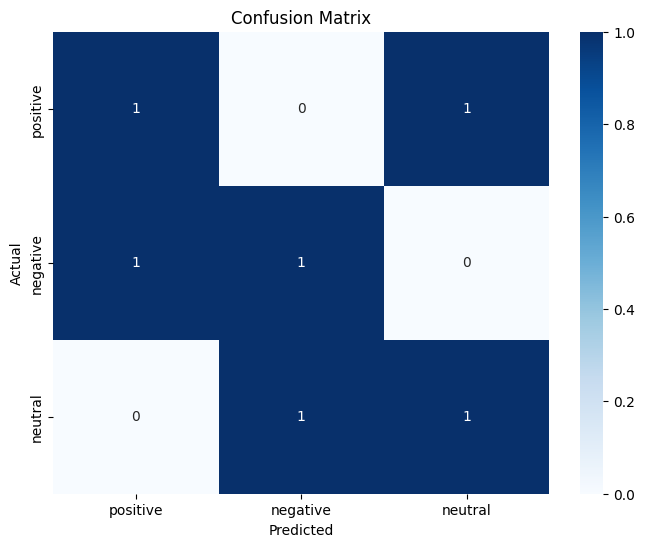

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['positive', 'negative', 'neutral'], yticklabels=['positive', 'negative', 'neutral'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()